Saving Titanic-Dataset.csv to Titanic-Dataset (5).csv
First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C12

/tmp/ipython-input-2100250618.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2100250618.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

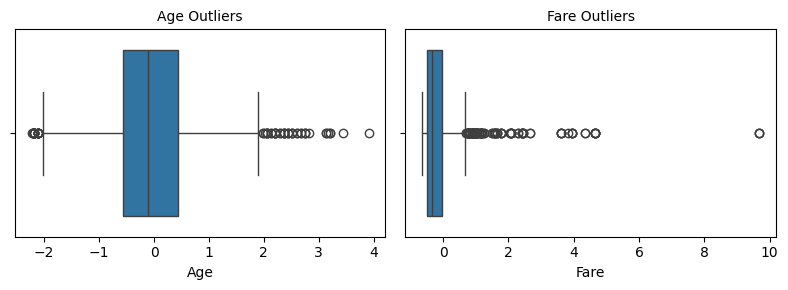


Shape after preprocessing: (775, 13)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Step 0: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Upload Titanic Dataset
from google.colab import files
uploaded = files.upload()

import io
# Get the actual filename from the uploaded dictionary
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Step 2: Explore Data
print("First 5 rows:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Step 3: Handle Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)
df.dropna(subset=['Embarked'], inplace=True)

# Step 4: Encode Categorical Variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male=1, female=0

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Step 5: Normalize/Standardize Features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Step 6: Visualize Outliers with Smaller Figures
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Age Outliers', fontsize=10)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title('Fare Outliers', fontsize=10)

plt.tight_layout()
plt.show()

# Step 7: Remove Outliers (Optional)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]

print("\nShape after preprocessing:", df.shape)

# Step 8: Save Cleaned Data
df.to_csv("titanic_cleaned.csv", index=False)
files.download("titanic_cleaned.csv")